In [1]:
import matplotlib.pyplot as plt
import numpy as np

/var/folders/12/mmc3d8454991wc3hmhncrv6c0000gp/T/ipykernel_7124/2553694971.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['', 'SDPA', 'value', 'key', 'query', 'dense'], fontsize=15)


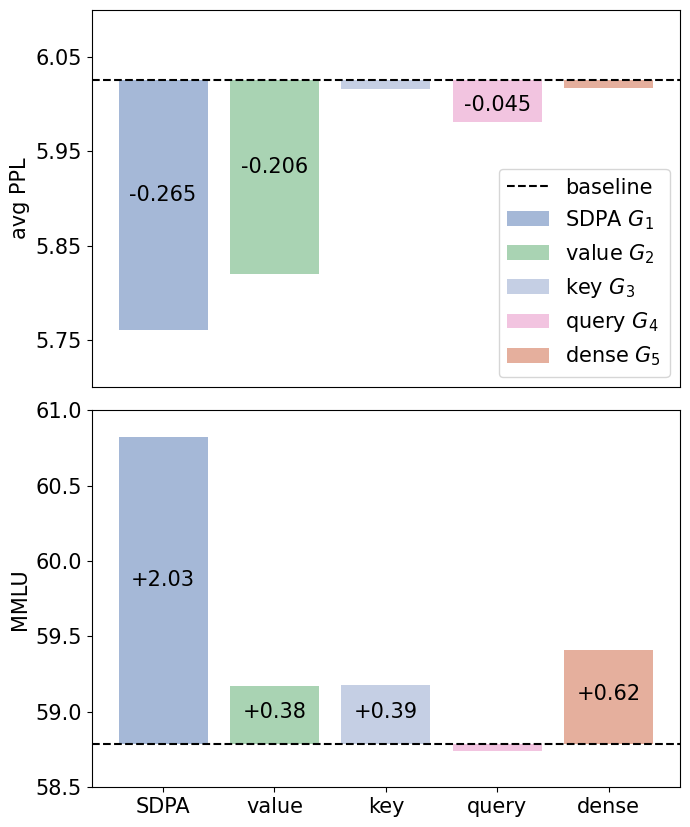

In [3]:
baseline = {'MMLU': 58.79, 'avg PPL': 6.026}
query_gate = {'MMLU': 58.74, 'avg PPL': 5.981}
key_gate = {'MMLU': 59.18, 'avg PPL': 6.016}
value_gate = {'MMLU': 59.17, 'avg PPL': 5.820}
SDPA_output_gate = {'MMLU': 60.82, 'avg PPL': 5.761}
dense_gate = {'MMLU': 59.41, 'avg PPL': 6.017}

SDPA_output_gate_color = '#4C72B0'
value_gate_color = '#55A868'
key_gate_color = '#8DA0CB'
query_gate_color = '#E78AC3'
dense_gate_color = '#CC613D'

fig, axs = plt.subplots(2, 1, figsize=(7, 9))
idx = np.arange(5)

axs[0].axhline(y=baseline['avg PPL'], color='black', linestyle='--', label='baseline')
axs[0].bar(idx[0], SDPA_output_gate['avg PPL'] - baseline['avg PPL'], bottom=baseline['avg PPL'],
           color=SDPA_output_gate_color, alpha=0.5, label='SDPA $G_1$')
axs[0].text(idx[0], (SDPA_output_gate['avg PPL'] + baseline['avg PPL']) / 2,
            f'{SDPA_output_gate['avg PPL'] - baseline['avg PPL']:.3f}', ha='center', va='bottom', fontsize=15)
axs[0].bar(idx[1], value_gate['avg PPL'] - baseline['avg PPL'], bottom=baseline['avg PPL'], color=value_gate_color,
           alpha=0.5, label='value $G_2$')
axs[0].text(idx[1], (value_gate['avg PPL'] + baseline['avg PPL']) / 2,
            f'{value_gate['avg PPL'] - baseline['avg PPL']:.3f}', ha='center', va='bottom', fontsize=15)
axs[0].bar(idx[2], key_gate['avg PPL'] - baseline['avg PPL'], bottom=baseline['avg PPL'], color=key_gate_color,
           alpha=0.5, label='key $G_3$')
axs[0].bar(idx[3], query_gate['avg PPL'] - baseline['avg PPL'], bottom=baseline['avg PPL'], color=query_gate_color,
           alpha=0.5, label='query $G_4$')
axs[0].text(idx[3], (query_gate['avg PPL'] + baseline['avg PPL']) / 2 - 0.015,
            f'{query_gate['avg PPL'] - baseline['avg PPL']:.3f}', ha='center', va='bottom', fontsize=15)
axs[0].bar(idx[4], dense_gate['avg PPL'] - baseline['avg PPL'], bottom=baseline['avg PPL'], color=dense_gate_color,
           alpha=0.5, label='dense $G_5$')

axs[0].legend(fontsize=15)
axs[0].set_ylim(5.7, 6.1)
axs[0].set_xticks([])
axs[0].set_ylabel('avg PPL', fontsize=15)
axs[0].set_yticks(np.linspace(5.75, 6.05, 4))
axs[0].tick_params(axis='y', labelsize=15)

axs[1].axhline(y=baseline['MMLU'], color='black', linestyle='--', label='baseline')
axs[1].bar(idx[0], SDPA_output_gate['MMLU'] - baseline['MMLU'], bottom=baseline['MMLU'], color=SDPA_output_gate_color,
           alpha=0.5, label='SDPA $G_1$')
axs[1].text(idx[0], (SDPA_output_gate['MMLU'] + baseline['MMLU']) / 2,
            f'+{SDPA_output_gate['MMLU'] - baseline['MMLU']:.2f}', ha='center', va='bottom', fontsize=15)
axs[1].bar(idx[1], value_gate['MMLU'] - baseline['MMLU'], bottom=baseline['MMLU'], color=value_gate_color, alpha=0.5,
           label='value $G_2$')
axs[1].text(idx[1], (value_gate['MMLU'] + baseline['MMLU']) / 2 - 0.05, f'+{value_gate['MMLU'] - baseline['MMLU']:.2f}',
            ha='center', va='bottom', fontsize=15)
axs[1].bar(idx[2], key_gate['MMLU'] - baseline['MMLU'], bottom=baseline['MMLU'], color=key_gate_color, alpha=0.5,
           label='key $G_3$')
axs[1].text(idx[2], (key_gate['MMLU'] + baseline['MMLU']) / 2 - 0.05, f'+{key_gate['MMLU'] - baseline['MMLU']:.2f}',
            ha='center', va='bottom', fontsize=15)
axs[1].bar(idx[3], query_gate['MMLU'] - baseline['MMLU'], bottom=baseline['MMLU'], color=query_gate_color, alpha=0.5,
           label='query $G_4$')
axs[1].bar(idx[4], dense_gate['MMLU'] - baseline['MMLU'], bottom=baseline['MMLU'], color=dense_gate_color, alpha=0.5,
           label='dense $G_5$')
axs[1].text(idx[4], (dense_gate['MMLU'] + baseline['MMLU']) / 2 - 0.05, f'+{dense_gate['MMLU'] - baseline['MMLU']:.2f}',
            ha='center', va='bottom', fontsize=15)

# axs[1].legend(fontsize=15)
axs[1].set_ylim(58.5, 61)
axs[1].set_xticklabels(['', 'SDPA', 'value', 'key', 'query', 'dense'], fontsize=15)
axs[1].set_ylabel('MMLU', fontsize=15)
axs[1].set_yticks(np.linspace(58.5, 61, 6))
axs[1].tick_params(axis='y', labelsize=15)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig('benchmark_ppl_comparison.pdf', pad_inches=0, bbox_inches='tight')
plt.show()